In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, LabelEncoder

<h1 style = color:orange>Regressor Tree</h1>

In [21]:
ohe = OneHotEncoder(sparse_output=False,drop = 'first').set_output(transform='pandas')

trns = make_column_transformer((ohe,make_column_selector(dtype_include=object)),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')



housing = pd.read_csv('../Datasets/Housing.csv')
X = housing.drop('price',axis = 1)
y = housing['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

X_train_trns = trns.fit_transform(X_train) 
X_test_trns = trns.transform(X_test) 

depths = [2,3,4,5,8,None]
leaves = [1,5,10,20,50]
splits = [2,5,10,20,50]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtr = DecisionTreeRegressor(random_state = 25,max_depth=d,min_samples_leaf=l,min_samples_split=s)  
            dtr.fit(X_train_trns,y_train)
            y_pred = dtr.predict(X_test_trns)
            scores.append([d,l,s,r2_score(y_test,y_pred)])

scores = pd.DataFrame(scores,columns=['death','leaves','splits','scores'])
scores.sort_values('scores',ascending=False)

,death,leaves,splits,scores
103,8.0,1,20,0.520188
108,8.0,5,20,0.517948
128,NaN,1,20,0.516177
78,5.0,1,20,0.514985
133,NaN,5,20,0.513971
...,...,...,...,...
127,NaN,1,10,0.344446
101,8.0,1,5,0.339508
126,NaN,1,5,0.286563
100,8.0,1,2,0.282023


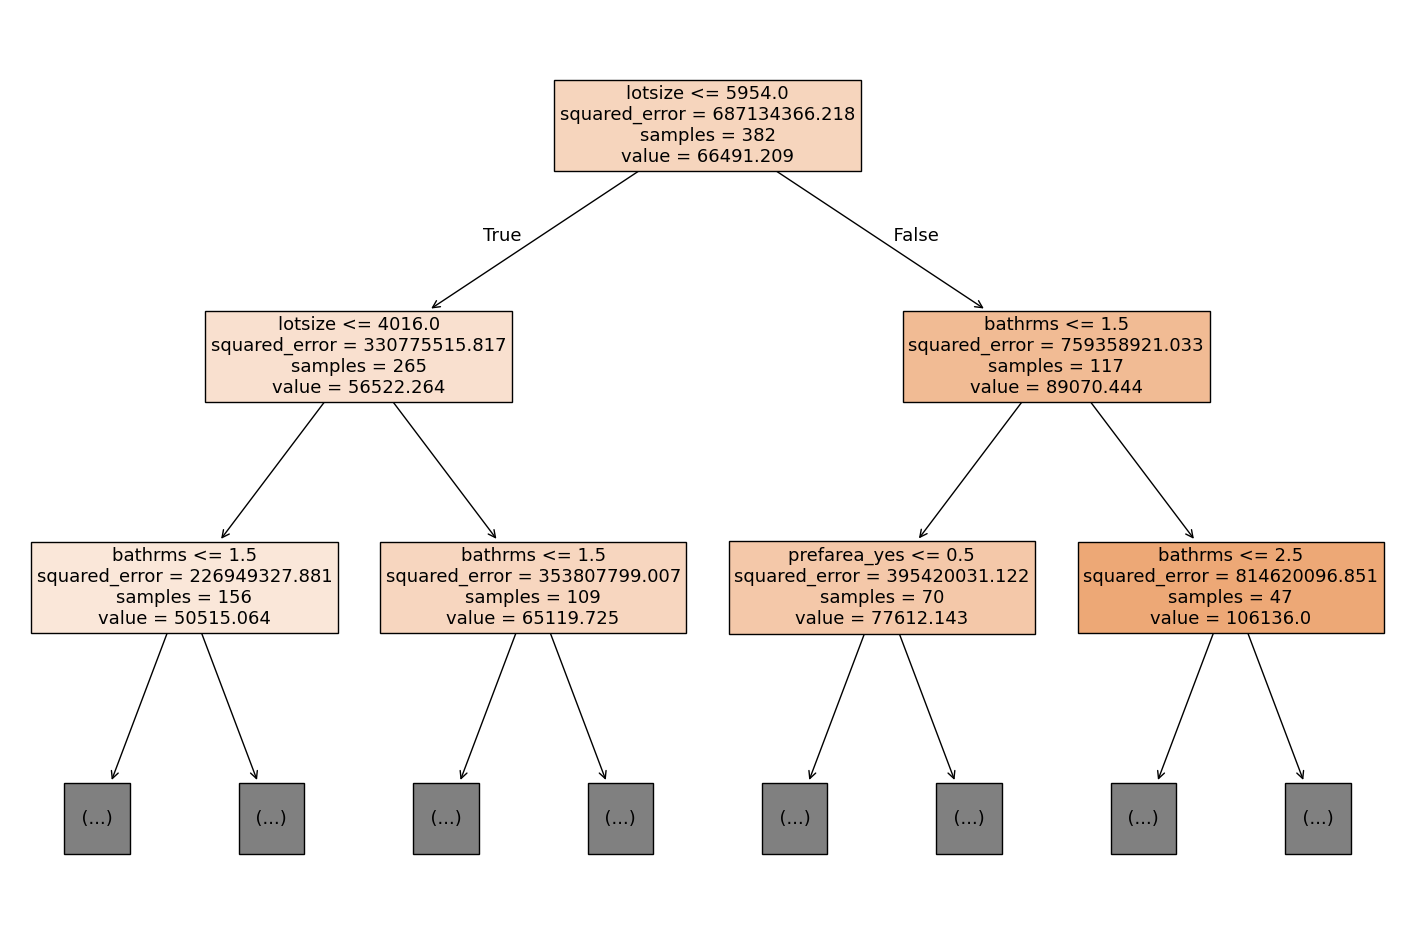

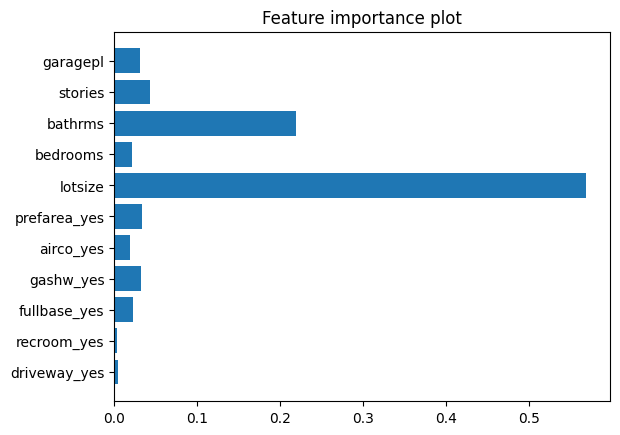

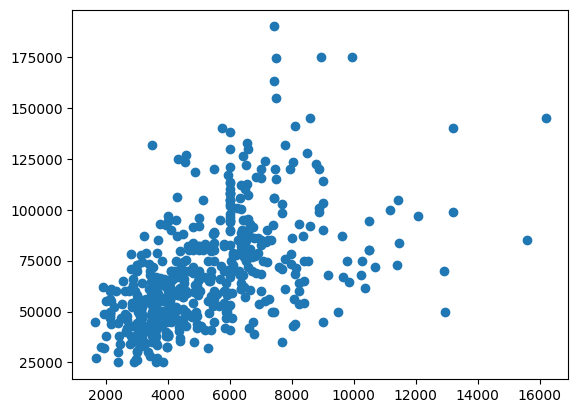

In [38]:
#important feacture

best_model = DecisionTreeRegressor(random_state= 25,max_depth=8,min_samples_leaf=1,min_samples_split=20)
best_model.fit(X_train_trns,y_train)
feature_importance = pd.DataFrame({'feature' : X_train_trns.columns , 'importance' : best_model.feature_importances_})
feature_importance.sort_values('importance',ascending=False) #print important feature

plt.figure(figsize=(18,12))

plot_tree(best_model,max_depth=2,filled=True,feature_names=list(X_train_trns.columns),fontsize=13)
plt.show()
plt.barh(feature_importance['feature'],feature_importance['importance'])
plt.title('Feature importance plot')
plt.show()
plt.scatter(housing['lotsize'],housing['price'])
plt.show()




In [ ]:
concrete = pd.read_csv('../Cases/Concrete_Strength/C')